In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flights = pd.read_csv(url1, sep=',')
weather = pd.read_csv(url2, sep=',')

1) Зависимость количества полетов от месяца. 

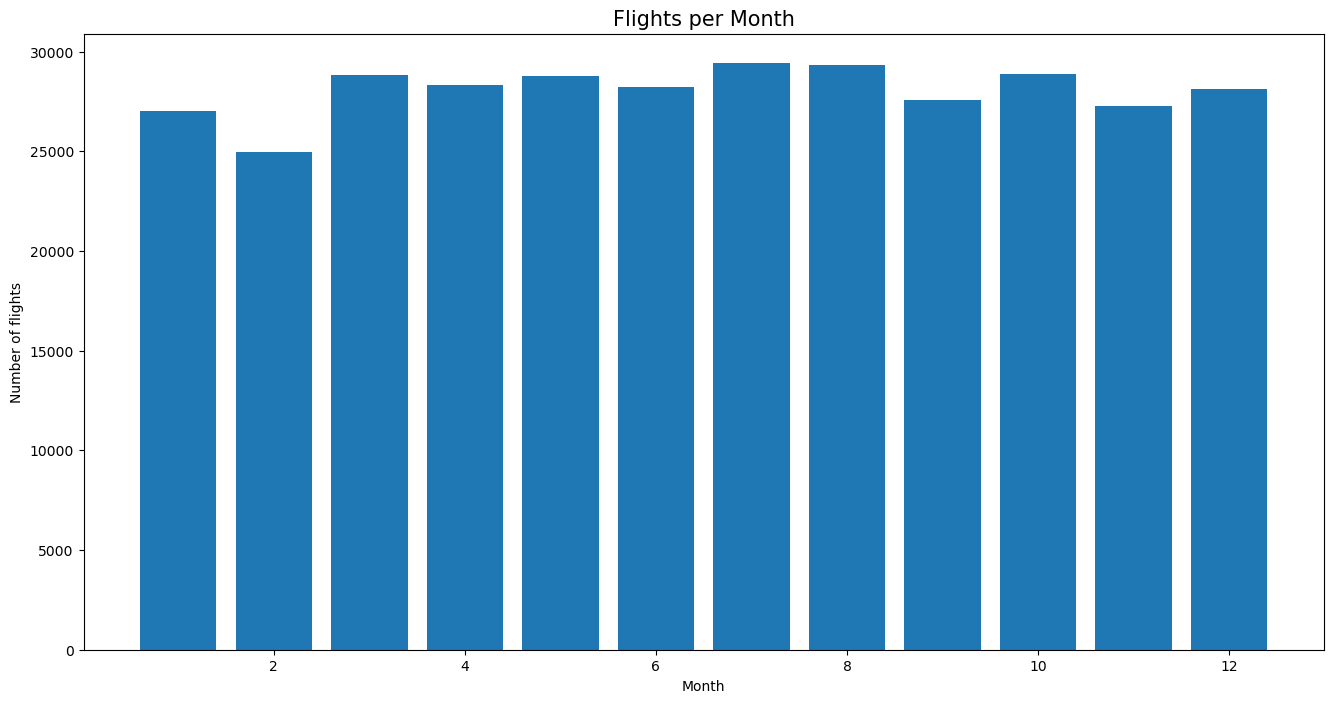

In [6]:
flight_attraction_month = flights.groupby('month')['Unnamed: 0']
arr = flight_attraction_month.count()
plt.figure(figsize=(16,8))
plt.bar(arr.index, arr)
plt.xlabel('Month')
plt.ylabel('Number of flights')
plt.title('Flights per Month', size=15)
plt.show()

Количество полетов во все месяцы практически одинаково, немного больше в июле и августе, чуть меньше в феврале.

2) Связь между количеством задержек и месяцами. 

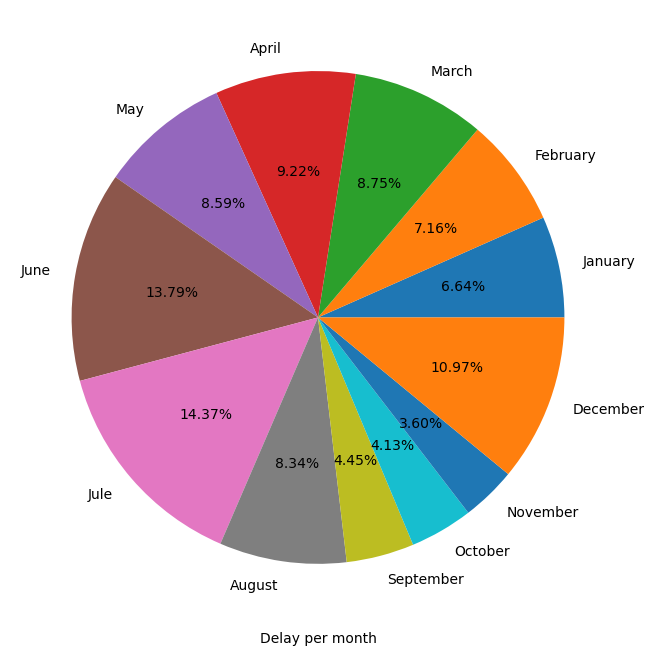

In [7]:
month_flights = flights.groupby("month")
delay = month_flights['dep_delay'].mean()
labels = ["January", "February", "March", "April", "May", "June", "Jule", "August",
          "September", "October", "November", "December" ]
plt.figure(figsize=(10,8))
plt.pie(delay, labels = labels, autopct='%1.2f%%')
plt.xlabel("Delay per month")
plt.show()

Наибольшее количество задержек в июне,июле и декабре. 

3) Зависимость задержек от времени суток.

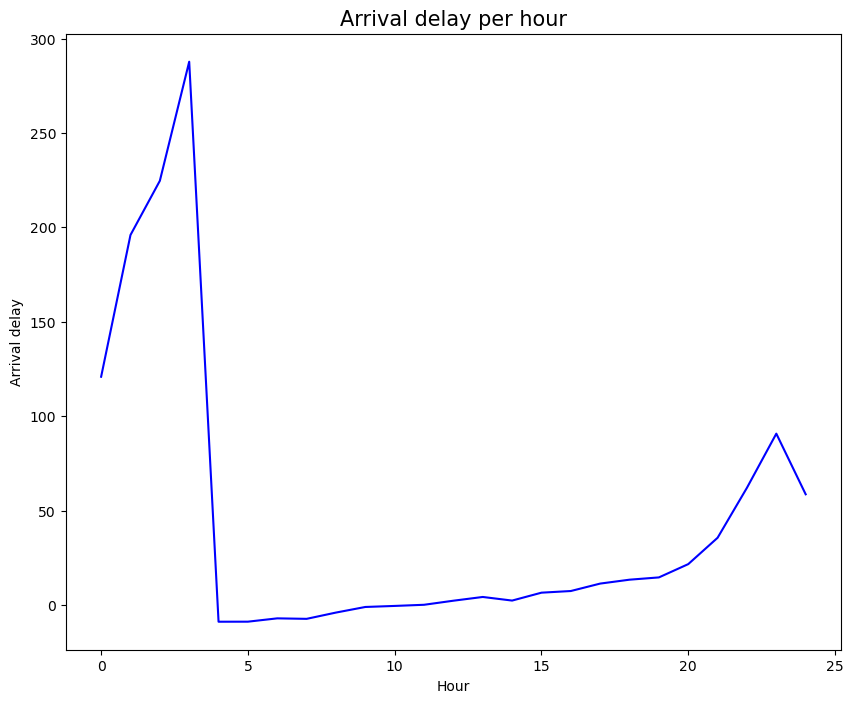

In [10]:
arrival_del = flights.dropna(subset=['arr_delay'])
arrival_del['arr_delay'].abs()
arrival_del = arrival_del.groupby('hour')['arr_delay'].mean()
plt.figure(figsize=(10,8))
plt.plot(arrival_del.index, arrival_del, c='b')
plt.xlabel('Hour')
plt.ylabel('Arrival delay')
plt.title('Arrival delay per hour', size=15)
plt.show()

Самое большое количество задержек происходит ночью с полуночи до трех.

4) Зависимость количества задержек от скорости ветра.  

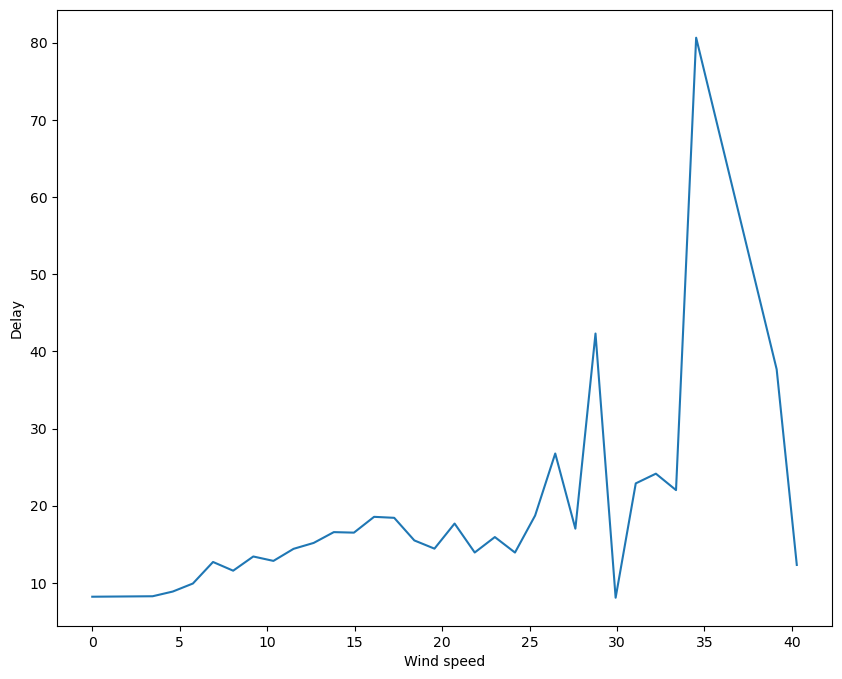

In [15]:
df=flights.merge(weather,on=['year','month','day','hour'],how='inner')
p=df.loc[:, ['dep_delay','wind_speed']].groupby('wind_speed').mean()
plt.figure(figsize=(10,8))
plt.plot(list(p.index[:-1]),list(p['dep_delay'])[:-1])
plt.xlabel('Wind speed')
plt.ylabel('Delay')
plt.show()

Чем выше скорость, тем более вероятно, что задержка будет более длинной.

5. Связь задержки и влажности воздуха.

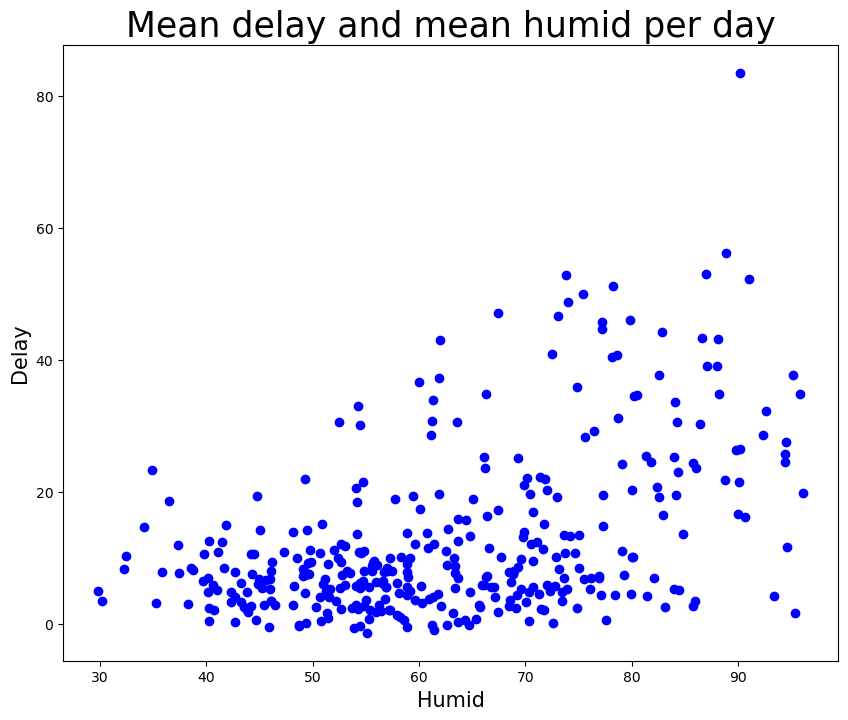

In [18]:
plt.figure(figsize=(10,8))
flight_weather = flights.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
humid = flight_weather.groupby(['month', 'day'])['humid'].mean()
rand = np.random.choice(336776, 365)
delay = flights.groupby(['month', 'day'])['dep_delay'].mean()
delay_correct = delay.drop(labels = [delay.index[-1]])
plt.scatter(humid, delay_correct, c='b')
plt.xlabel('Humid', size=15)
plt.ylabel("Delay", size=15)
plt.title('Mean delay and mean humid per day', size=25)
plt.show()

Чем больше влажность, тем дольше задержка.